## Derivatives

#### Second order finite differences

$$f(x+\Delta x) \approx f(x) + \Delta x {df\over dx} + {(\Delta x)^2\over 2}{d^2f\over dx^2}$$

$$f(x-\Delta x) \approx f(x) - \Delta x {df\over dx} + {(\Delta x)^2\over 2}{d^2f\over dx^2}$$

Adding and subtracting these equations gives the two expressions in the exercise.

#### Optimal step size

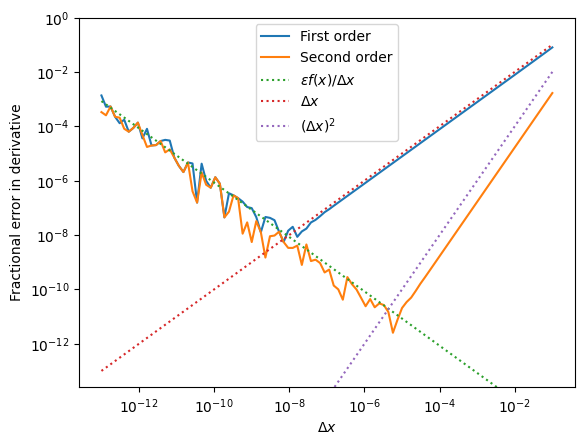

In [46]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

dx_vals = 10**np.linspace(-13, -1, 100)

x = 1.0 # Evaluate the derivatives 

err = np.zeros_like(dx_vals)   # to store the fractional error from the 1st order difference
err2 = np.zeros_like(dx_vals)  # same for the second order

for i, dx in enumerate(dx_vals):
    dfdx1 = (f(x + dx) - f(x)) / dx
    err[i] = np.abs((dfdx1 - np.cos(x))/np.cos(x))

    dfdx2 = (f(x + dx) - f(x - dx)) / (2*dx)
    err2[i] = np.abs((dfdx2 - np.cos(x))/np.cos(x))

# Plot the results
plt.plot(dx_vals, err, label="First order")
plt.plot(dx_vals, err2, label="Second order")

plt.ylim((1e-2*min(err2), 1.0))

# and the analytic expressions
plt.plot(dx_vals, 1e-16 * f(x) / dx_vals, ":", label=r'$\epsilon f(x)/\Delta x$')
plt.plot(dx_vals, dx_vals, ":", label=r'$\Delta x$')
plt.plot(dx_vals, dx_vals**2, ":", label=r'$(\Delta x)^2$')


plt.yscale('log')
plt.xscale('log')
plt.xlabel(r'$\Delta x$')
plt.ylabel('Fractional error in derivative')
plt.legend()
plt.show()

The optimal step size for the 1st order expression is $\sim \epsilon^{1/2}\sim 10^{-8}$ and the associated error is also $\sim \epsilon^{1/2}$. 

For the second order expression, the finite difference error is $\propto (\Delta x)^2$ rather than $\Delta x$. Following the same argument as for the first order derivative leads to an optimal step size of order $\epsilon^{1/3}\sim 10^{-16/3}\sim 10^{-5.3}$, and an error $\epsilon^{2/3}\sim 10^{-10.6}$.

Notice that a higher order derivative allows us to get a better error with a larger step size.